In [39]:
L3(x) = 3 * sin(pi * x) * sin(pi * x / 3) / (pi**2 * x**2)

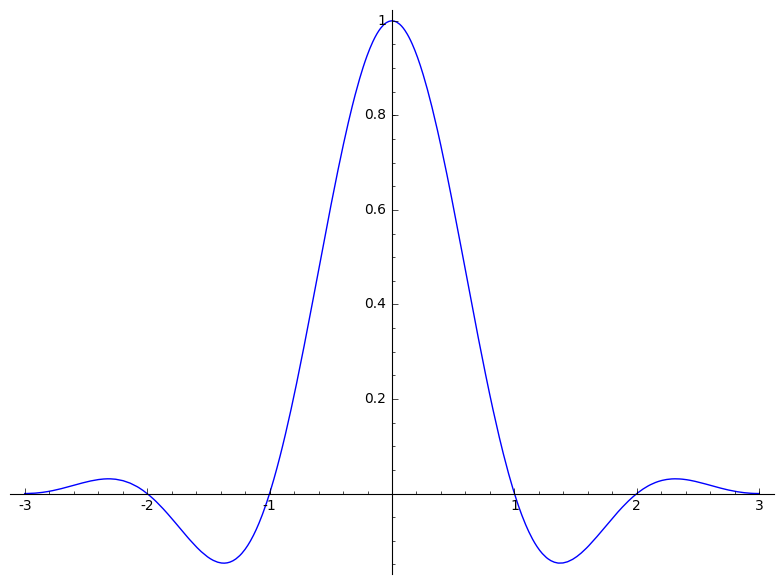

In [40]:
plot(L3(x), -3, 3)

If we convolve a signal by the Lanczos shift kernel L(dx) for dx in [0, 1], then

    (f conv L(dx))(x) = \sum_{i=-\inf}^{+\inf} f(x-i) * L(i - dx)
    
for continuous dx and discrete x.

The Lanczos-3 kernel is zero outside [-3,3], so this is equal to the finite sum with limits

    (f conv L3(dx))(x) = \sum_{i=-2}^{+3} f(x-i) * L3(i - dx)

And in particular, if we take f(x) to be the top-hat function

    f(x) = t(x) = {1 if x = 0, 0 otherwise}

then this drops out the discrete terms:

    [t conv L3(dx)](x) = \sum_{i=-2}^{+3} t(x - i) L(i - dx)

                      = (x==-2)*L3(-2 - dx) + (x==-1)*L3(-1 - dx) + ... + (x==3)*L3(3-dx)

which can also be seen as a look-up table for the discrete values of x from -2 to +3:

    [t conv L3(dx)](x) = 0 if x < -2 or x > 3
                      = L3(x - dx)   otherwise

Now, the (discrete) centroid of that (discrete) function is

    [t conv L3(dx)](x) * x = \sum_{x=-2}^{+3} x L3(x-dx)


In [46]:
cen3(dx) = -2*L3(-2-dx) + -1*L3(-1-dx) + 1*L3(1-dx) + 2*L3(2-dx) + 3*L3(3-dx)

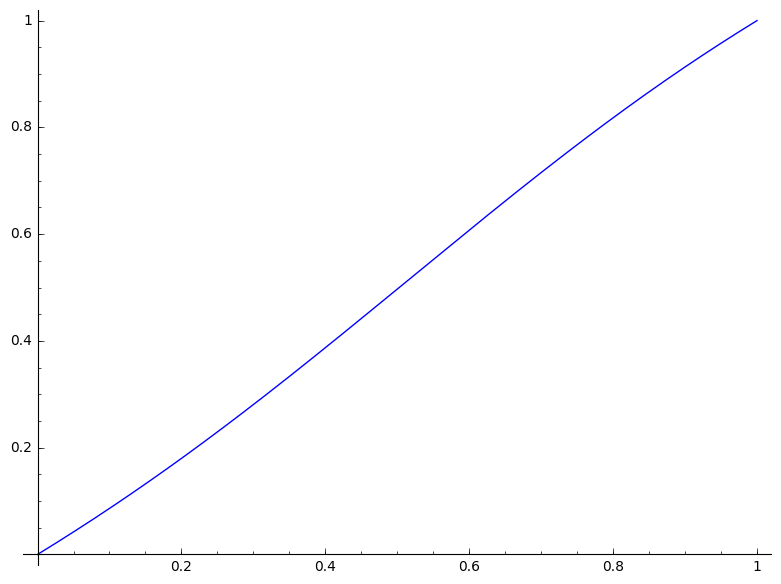

In [47]:
plot(cen3(dx), 0, 1)

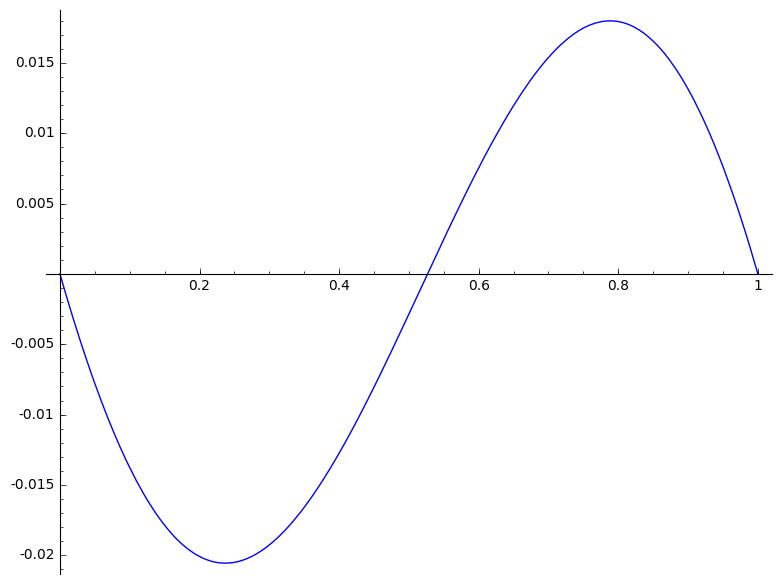

In [48]:
plot(cen3(dx)-dx, 0, 1)

This shows us that the standard Lanczos-3 kernel shifts the centroid of the top-hat signal by dx +- 0.02 pixels when we try to shift by dx pixels.

Since we can build any discrete signal as a linear sum of top-hats, the same holds for any signal.

What about the normalized version of the Lanczos kernel typically used in astro?

In [49]:
cen3norm(dx) = cen3(dx) / (L3(-2-dx) + L3(-1-dx) + L3(-dx) + L3(1-dx) + L3(2-dx) + L3(3-dx))

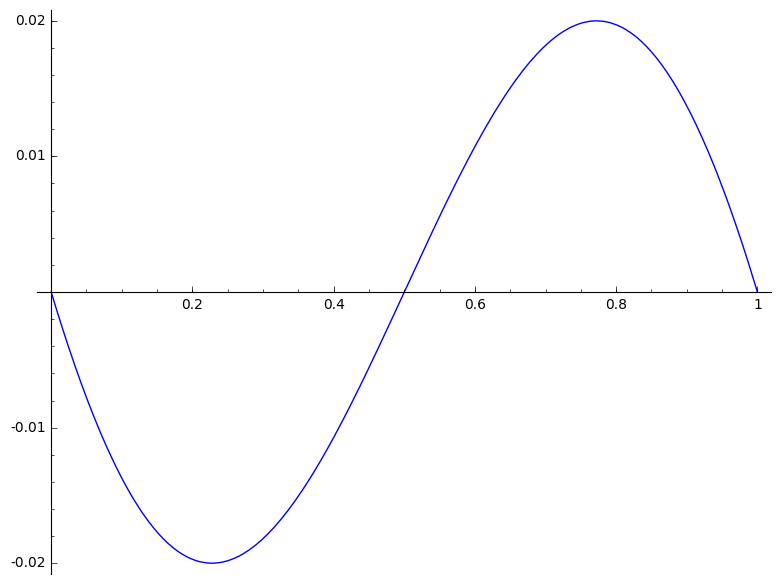

In [51]:
plot(cen3norm(dx)-dx, 0, 1)

which looks pretty much the same.

In [52]:
cen3(dx)

9*sin(3*pi - pi*dx)*sin(pi - 1/3*pi*dx)/(pi^2*(dx - 3)^2) + 3*sin(pi - pi*dx)*sin(1/3*pi - 1/3*pi*dx)/(pi^2*(dx - 1)^2) - 3*sin(-1/3*pi - 1/3*pi*dx)*sin(-pi - pi*dx)/(pi^2*(dx + 1)^2) + 6*sin(2/3*pi - 1/3*pi*dx)*sin(-pi*dx)/(pi^2*(dx - 2)^2) - 6*sin(-2/3*pi - 1/3*pi*dx)*sin(-pi*dx)/(pi^2*(dx + 2)^2)

In [101]:
sin_ex(x) = x - 1/6*x**3 + 1/120*x**5 - 1/5040*x**7 + 1/362880*x**9 - 1/39916800*x**11

In [100]:
2*3*4*5*6*7 * 8*9 * 10*11

39916800

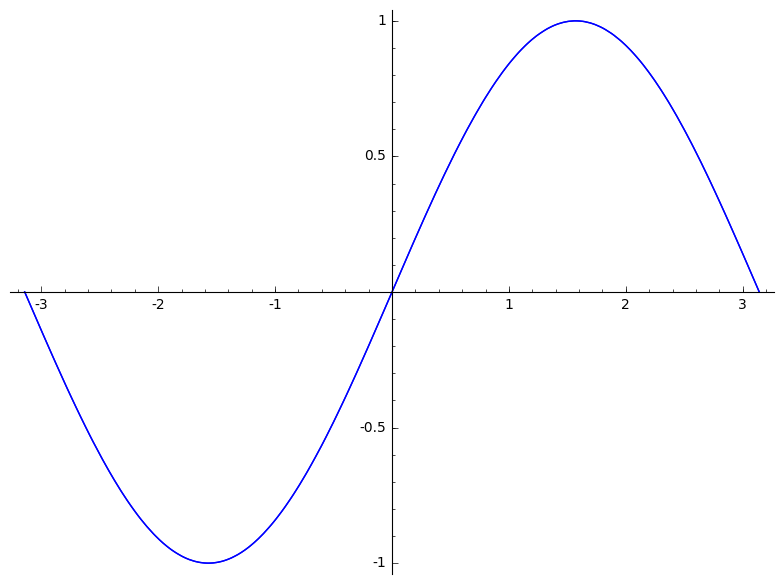

In [102]:
plot(sin_ex(x), -pi, pi) + plot(sin(x), -pi, pi)

In [83]:
cen3ex(dx) = (+9*sin_ex(   3*pi -     pi*dx)*sin_ex(    pi - 1/3*pi*dx)/(pi**2*(dx - 3)**2)
              +3*sin_ex(     pi -     pi*dx)*sin_ex(1/3*pi - 1/3*pi*dx)/(pi**2*(dx - 1)**2)
              -3*sin_ex(-1/3*pi - 1/3*pi*dx)*sin_ex(-   pi     - pi*dx)/(pi**2*(dx + 1)**2)
              +6*sin_ex( 2/3*pi - 1/3*pi*dx)*sin_ex(            -pi*dx)/(pi**2*(dx - 2)**2)
              -6*sin_ex(-2/3*pi - 1/3*pi*dx)*sin_ex(            -pi*dx)/(pi**2*(dx + 2)**2))

In [103]:
cen3ex(dx) = (+9*sin_ex(     pi -     pi*dx)*sin_ex(    pi - 1/3*pi*dx)/(pi**2*(dx - 3)**2)
              +3*sin_ex(     pi -     pi*dx)*sin_ex(1/3*pi - 1/3*pi*dx)/(pi**2*(dx - 1)**2)
              -3*sin_ex(-1/3*pi - 1/3*pi*dx)*sin_ex(+   pi     - pi*dx)/(pi**2*(dx + 1)**2)
              +6*sin_ex( 2/3*pi - 1/3*pi*dx)*sin_ex(            -pi*dx)/(pi**2*(dx - 2)**2)
              -6*sin_ex(-2/3*pi - 1/3*pi*dx)*sin_ex(            -pi*dx)/(pi**2*(dx + 2)**2))

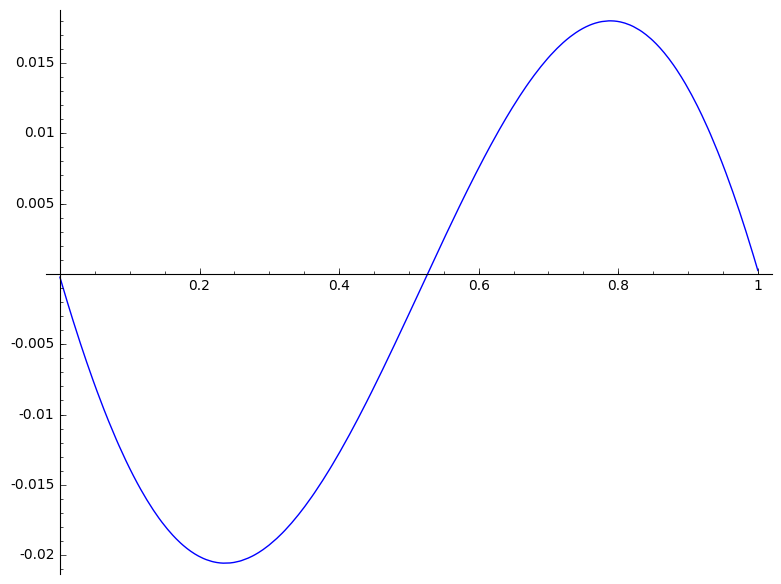

In [104]:
plot(cen3ex(dx)-dx, 0, 1)